# Image Classification

In [1]:
# This block is needed (only) for Colab
# If Colab: Click Runtime -> Change runtime type -> select Hardware accelerator: GPU
# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()

## Classfication of Pet Breeds 

In [2]:
from fastai.vision.all import *

In [3]:
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU Device Name:", torch.cuda.get_device_name(0))

CUDA available: True
GPU Device Name: NVIDIA GeForce RTX 4050 Laptop GPU


### Data Preparation

In [4]:
path = untar_data(URLs.PETS)

### Preparing the FastAi Datablock

In [5]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))

### Loading the Data

In [6]:
dls = pets.dataloaders(path/"images", num_workers=0)

### Checking if Data and Labeling is Correct

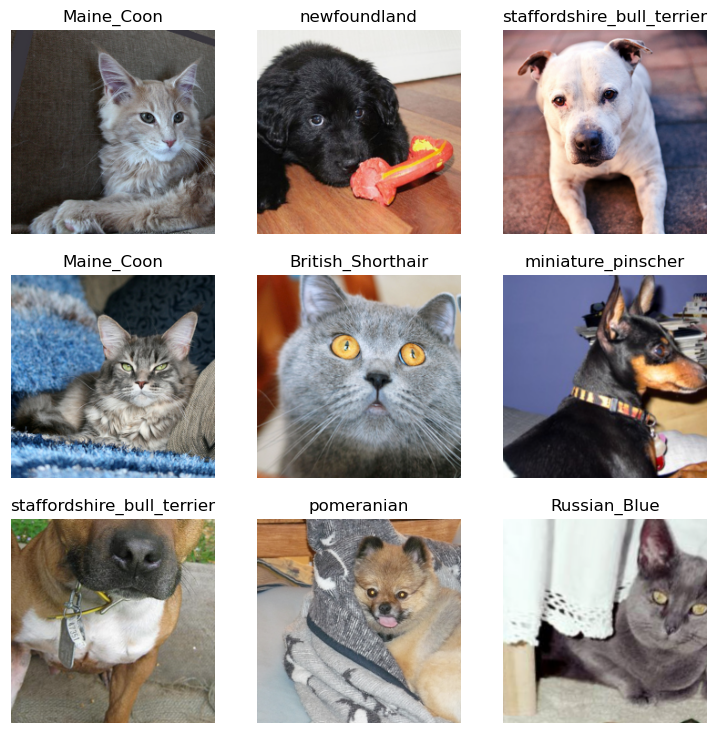

In [7]:
dls.show_batch(nrows=3, ncols=3)

### Define the Parameters of the Model

In [8]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

### Train the Model

In [9]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.547984,0.324930,0.097429,01:57


epoch,train_loss,valid_loss,error_rate,time
0,0.462112,0.311594,0.096076,01:39
1,0.375822,0.228187,0.076455,01:45
2,0.233313,0.189459,0.063599,01:50


### Model Interpretation

In [10]:
interp = ClassificationInterpretation.from_learner(learn)

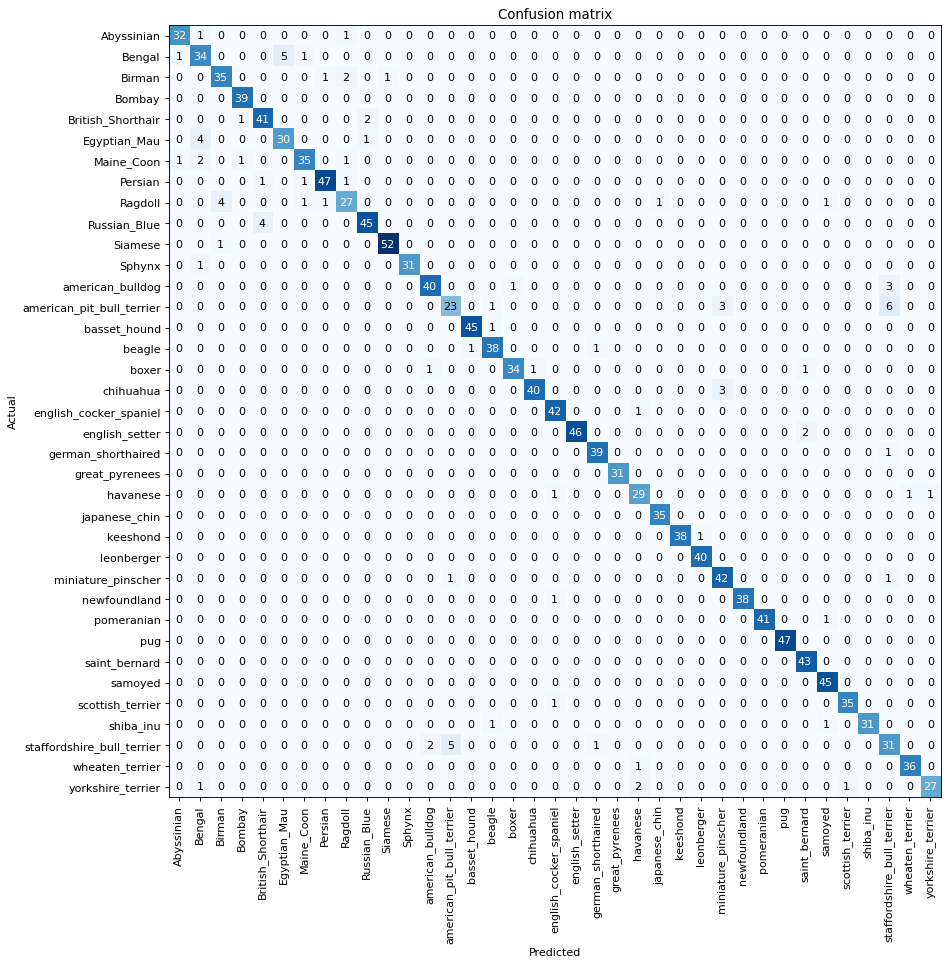

In [11]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=80)

In [12]:
interp.most_confused(min_val=5)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Bengal', 'Egyptian_Mau', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5)]